#### Packages required

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

### BUSINESS PROBLEM - 1

In [25]:
data=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Basic Statistics - Hypothesis Testing/LoansData.csv')

In [26]:
data.head(2)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

#### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [27]:
data['Interest.Rate']=pd.to_numeric(data['Interest.Rate'].str.replace('%',''))

In [108]:
# Outlier treatment
data[['Amount.Requested','Interest.Rate']]=data[['Amount.Requested','Interest.Rate']].apply(lambda x:x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [28]:
# Missing value treatment
data['Amount.Requested']=data['Amount.Requested'].fillna(np.mean(data['Amount.Requested']))
data['Interest.Rate']=data['Interest.Rate'].fillna(np.mean(data['Interest.Rate']))

In [109]:
# H0 - No relationship between interest rate and loan amount
# Ha - Relationship exists between interest rate and loan amount
# 
# CI - 95%, p - 0.05

# performing pearson correlation test
stats.pearsonr(data['Amount.Requested'],data['Interest.Rate'])

# On the basis of p values, p value of the test is very small compared to cutoff p at 95%; 
# Rejecting the null hypothesis.

# business conclusion
# There is positive, intermediate correlation between interest rate and loan amount.
# This claim is made at the CI of 95%.


(0.3307712190844858, 6.760892826466205e-65)

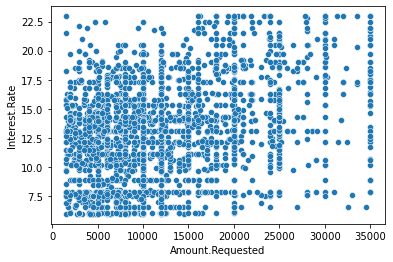

In [116]:
sns.scatterplot(data['Amount.Requested'],data['Interest.Rate'])
plt.show()

#### b. Loan length is directly effecting interest rate.

In [30]:
data['Loan.Length']=pd.to_numeric(data['Loan.Length'].str.replace(' months',''))

In [90]:
# H0 - No relationship between interest rate and loan Length
# Ha - Relationship exists between interest rate and loan Length
# 
# CI - 95%, p - 0.05

# performing pearson correlation test
stats.pearsonr(data['Loan.Length'],data['Interest.Rate'])

# On the basis of p values, p value of the test is very small compared to cutoff p at 95%; 
# Rejecting the null hypothesis.

# business conclusion
# There is positive intermediate correlation between interest rate and loan Length.
# This claim is made at the CI of 95%.


(0.4241719241662059, 9.54959606435366e-110)

#### c. Interest rate varies for different purpose of loans

In [91]:
data.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [94]:
data['Loan.Purpose'].nunique()

14

In [96]:
data['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [19]:
# filter the data for different Loan Purpose 
LP1=data.loc[data['Loan.Purpose'] =='debt_consolidation','Interest.Rate']
LP2=data.loc[data['Loan.Purpose'] =='credit_card','Interest.Rate']
LP3=data.loc[data['Loan.Purpose'] =='other','Interest.Rate']
LP4=data.loc[data['Loan.Purpose'] =='home_improvement','Interest.Rate']
LP5=data.loc[data['Loan.Purpose'] =='major_purchase','Interest.Rate']
LP6=data.loc[data['Loan.Purpose'] =='small_business','Interest.Rate']
LP7=data.loc[data['Loan.Purpose'] =='car','Interest.Rate']
LP8=data.loc[data['Loan.Purpose'] =='wedding','Interest.Rate']
LP9=data.loc[data['Loan.Purpose'] =='medical','Interest.Rate']
LP10=data.loc[data['Loan.Purpose'] =='moving','Interest.Rate']
LP11=data.loc[data['Loan.Purpose'] =='vacation','Interest.Rate']
LP12=data.loc[data['Loan.Purpose'] =='house','Interest.Rate']
LP13=data.loc[data['Loan.Purpose'] =='educational','Interest.Rate']
LP14=data.loc[data['Loan.Purpose'] =='renewable_energy','Interest.Rate']

# display the means of the every loan purpose
print( 'mean of LP1: ', LP1.mean(),'mean of LP2: ', LP2.mean(),'mean of LP3: ', LP3.mean(),'\n'
      'mean of LP4: ', LP4.mean(),'mean of LP5: ', LP5.mean(),'mean of LP6: ', LP6.mean(),'\n'
      'mean of LP7: ', LP7.mean(),'mean of LP8: ', LP8.mean(),'mean of LP9: ', LP9.mean(),'\n'
      'mean of LP10: ', LP10.mean(),'mean of LP11: ', LP11.mean(),'mean of LP12: ', LP12.mean(),'\n'
      'mean of LP13: ', LP13.mean(),'mean of LP14: ', LP14.mean(),'\n')

# H0: means are same; or samples are from same population
# Ha: means are not same
# CI = 95%, p = 0.05

# perform the test
stats.f_oneway(LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP8,LP9,LP10,LP11,LP12,LP13,LP14)

# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0

# business conclusion
# Different purpose of loan are associated with different Interest rate and 
# this claim is made at the cI of 95%.


mean of LP1:  13.586916602907444 mean of LP2:  13.050687811510445 mean of LP3:  13.159552238805967 
mean of LP4:  11.594276315789479 mean of LP5:  10.797821782178215 mean of LP6:  12.839195402298845 
mean of LP7:  11.113000000000001 mean of LP8:  12.073215084888428 mean of LP9:  11.649666666666668 
mean of LP10:  13.621034482758622 mean of LP11:  11.966190476190476 mean of LP12:  13.448000000000002 
mean of LP13:  11.007333333333332 mean of LP14:  9.8775 



F_onewayResult(statistic=7.4826387840974355, pvalue=1.1599665535989115e-14)

#### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [31]:
data['Home.Ownership'].nunique()

5

In [54]:
data['Home.Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [33]:
data.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [34]:
data[['Fico_low','Fico_high']]=data['FICO.Range'].apply(lambda x:pd.Series(str(x).split('-')))

In [35]:
data[['Fico_low','Fico_high']]=data[['Fico_low','Fico_high']].dropna().apply(lambda x:pd.Series(pd.to_numeric(x)))

In [73]:
data['FICO_Avg']=((data.Fico_high+data.Fico_low)/2)
data['FICO_Avg']=data['FICO_Avg'].fillna(np.mean(data['FICO_Avg']))

In [74]:
data.FICO_Avg.isnull().sum()

0

In [75]:
data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico_low,Fico_high,FICO_Avg
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,735.0,739.0,737.0
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,715.0,719.0,717.0
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,690.0,694.0,692.0
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,695.0,699.0,697.0
4,12000.0,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,695.0,699.0,697.0


In [ ]:
## filter the data for different Home_ownership category:

Home_Own_1=data.loc[data['Home.Ownership'] =='MORTGAGE' ,'FICO_Avg']
Home_Own_2=data.loc[data['Home.Ownership'] =='RENT' ,'FICO_Avg']
Home_Own_3=data.loc[data['Home.Ownership'] =='OWN' ,'FICO_Avg']
Home_Own_4=data.loc[data['Home.Ownership'] =='OTHER' ,'FICO_Avg']
Home_Own_5=data.loc[data['Home.Ownership'] =='NONE' ,'FICO_Avg']


# display the mean value for different Home_ownership category:
print('Mean for MORTGAGE home ownership' , Home_Own_1.mean(),'\n', 
      'Mean for RENT home ownership', Home_Own_2.mean(),'\n',
     'Mean for OWN home ownership', Home_Own_3.mean(),'\n',
      'Mean for OTHER home ownership',Home_Own_4.mean(),'\n',
      'Mean for NONE home ownership',Home_Own_5.mean())



# # H0: means are same    or  u1 = u2 =u3
# Ha: means are not same for atleast 1  or  u1 <> u2 <> u3 
# CI = 95%, p = 0.05

# perform the test
stats.f_oneway(Home_Own_1,Home_Own_2,Home_Own_3,Home_Own_4,Home_Own_5)

# based on p values, p value of the test is low compared to cutoff p at 95%; 
# thus we will  reject the H0

# business conclusion
#  Different home ownership do influence Fico scores ,claim is made at 95%CI

### BUSINESS PROBLEM - 2
We would like to assess if there is any difference in the average
price quotes provided by Mary and Barry.

In [123]:
price=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Basic Statistics - Hypothesis Testing/Price_Quotes.csv')

In [124]:
price.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [125]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [132]:
# mean of the Barry's Price and Mary's Price
print( "mean of the Barry's Price:" , price.Barry_Price.mean() )
print(  "mean of the Mary's Price:" , price.Mary_Price.mean() ,'\n' )

# H0 : u1 = u2
# Ha : u1 <> u2

# CI = 95%, p = 0.05

# perform the test
print( stats.ttest_rel(price.Barry_Price,price.Mary_Price) )

# based on p values, p value of the test is lower compared to cutoff p at 95%; 
# thus we will reject the H0

# business conclusion
# Price quotes provided by Bary and Mary are different,and this claim is made at 95% CI

mean of the Barry's Price: 124.33333333333333
mean of the Mary's Price: 114.75 

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)


### BUSINESS PROBLEM - 3
Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [8]:
treatment=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Basic Statistics - Hypothesis Testing/Treatment_Facility.csv')

In [9]:
treatment.head(2)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [10]:
treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [11]:
# Renaming VAR4 and VAR5 columns to their proper names:

treatment.rename(columns={'VAR4':'TRFF_Per','VAR5':'CI_per'},inplace=True)

In [12]:
treatment.head(2)

,Month,Reengineer,Employee_Turnover,TRFF_Per,CI_per
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [13]:
treatment.Reengineer.nunique()

2

In [14]:
treatment.Reengineer.value_counts()

Prior    13
Post      7
Name: Reengineer, dtype: int64

In [23]:
## filter the data for prior and post reengineering month's  CI( critical incident %)

prior = treatment.loc[treatment.Reengineer=='Prior','CI_per']
post = treatment.loc[treatment.Reengineer=='Post','CI_per']


# display the variance for prior and post reengineering month's CI:
print('variance for prior reengineering CI% ',np.var(prior),'\n',
      'variance for post reengineering CI% ' , np.var(post))

# NOTE: Going with unequal variance ttest, huge difference  in the two variance.

# # H0: means are same    or  u1 = u2
# Ha: means are not same  or  u1 <> u2
# CI = 95%, p = 0.05

# perform the test
stats.ttest_ind(prior,post,equal_var=False)###IMP


# based on p values, p value of the test is low compared to cutoff p at 95%; 
# thus we will  reject the H0

# business conclusion
# Reengineering effort changed the critical incidence rate and this claim is made at 95% CI. 

variance for prior reengineering CI%  2188.851951255721 
 variance for post reengineering CI%  52.258022415666076


Ttest_indResult(statistic=2.209006531430452, pvalue=0.045565519570193176)

### BUSINESS PROBLEM - 4
We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether this is, in fact, occurring.

In [5]:
assessment=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Basic Statistics - Hypothesis Testing/Priority_Assessment.csv')

In [6]:
assessment.head(2)

,Days,Priority
0,3.3,High
1,7.9,Medium


In [168]:
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [169]:
assessment.Priority.nunique()

3

In [177]:
# filter the data according to different priority days
high_P = assessment.loc[assessment.Priority=='High','Days']
med_P  = assessment.loc[assessment.Priority=='Medium','Days']
low_P  = assessment.loc[assessment.Priority=='Low','Days']

# display the means of the 3 types of priority days
print( 'mean of high_Priority: ', high_P.mean(),'\n',
       'mean of medium_Priority: ', med_P.mean(),'\n',
       'mean of low_Priority: ', low_P.mean(),'\n')
      
      

# H0: means are same; or samples are from same population
# Ha: means are not same
# CI = 95%, p = 0.05

# perform the test
stats.f_oneway(high_P,low_P,med_P)

# based on p values, p value of the test is large as  compared to cutoff p at 95%; 
# thus we will fail to  reject the H0

# business conclusion
# We are not sure whether prioritization sytstem is working or not and 
# this claim is made at the cI of 95%.

mean of high_Priority:  3.023619631901845 
 mean of medium_Priority:  2.5000000000000004 
 mean of low_Priority:  4.228358208955225 



F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

# BUSINESS PROBLEM 5

#### Use the survey results to address the following questions
    1. What is the overall level of customer satisfaction?
    2. What factors are linked to satisfaction?
    3. What is the demographic profile of Film on the Rocks patrons?
    4. In what media outlet(s) should the film series be advertised?

In [79]:
films=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Basic Statistics - Hypothesis Testing/Films.csv')

In [80]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [81]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


####  Ques:1 What is the overall level of customer satisfaction?

In [184]:
films.Overall.median()

2.0

####  Ques:2 What factors are linked to satisfaction?

In [82]:
obs1=pd.crosstab(films.Overall,films.Clean)
stats.chi2_contingency(observed=obs1)
# cleanliness of the venue effects customer satisfaction 
# claim made at 95% CI

(125.17708834561675,
 5.517448379868074e-19,
 16,
 array([[6.64954128e+01, 7.01896024e+01, 1.10825688e+01, 2.30886850e+00,
         9.23547401e-01],
        [7.00183486e+01, 7.39082569e+01, 1.16697248e+01, 2.43119266e+00,
         9.72477064e-01],
        [5.28440367e+00, 5.57798165e+00, 8.80733945e-01, 1.83486239e-01,
         7.33944954e-02],
        [4.40366972e-01, 4.64831804e-01, 7.33944954e-02, 1.52905199e-02,
         6.11620795e-03],
        [1.76146789e+00, 1.85932722e+00, 2.93577982e-01, 6.11620795e-02,
         2.44648318e-02]]))

In [188]:
obs2=pd.crosstab(films.Overall,films.Parking)

stats.chi2_contingency(observed=obs2)
# Parking for the venue effects customer satisfaction 
# claim made at 95% CI

(229.47943657632044,
 8.162450437897989e-40,
 16,
 array([[6.18776758e+01, 7.06513761e+01, 1.33914373e+01, 3.23241590e+00,
         1.84709480e+00],
        [6.51559633e+01, 7.43944954e+01, 1.41009174e+01, 3.40366972e+00,
         1.94495413e+00],
        [4.91743119e+00, 5.61467890e+00, 1.06422018e+00, 2.56880734e-01,
         1.46788991e-01],
        [4.09785933e-01, 4.67889908e-01, 8.86850153e-02, 2.14067278e-02,
         1.22324159e-02],
        [1.63914373e+00, 1.87155963e+00, 3.54740061e-01, 8.56269113e-02,
         4.89296636e-02]]))

In [189]:
obs3=pd.crosstab(films.Overall,films.Sinage)

stats.chi2_contingency(observed=obs3)
# Signage to the venue effects customer satisfaction 
# claim made at 95% CI

(124.81695331531306,
 6.47639805161236e-19,
 16,
 array([[5.18348624e+01, 7.11009174e+01, 2.20183486e+01, 2.75229358e+00,
         2.29357798e+00],
        [5.52905199e+01, 7.58409786e+01, 2.34862385e+01, 2.93577982e+00,
         2.44648318e+00],
        [4.14678899e+00, 5.68807339e+00, 1.76146789e+00, 2.20183486e-01,
         1.83486239e-01],
        [3.45565749e-01, 4.74006116e-01, 1.46788991e-01, 1.83486239e-02,
         1.52905199e-02],
        [1.38226300e+00, 1.89602446e+00, 5.87155963e-01, 7.33944954e-02,
         6.11620795e-02]]))

#### Ques:3 What is the demographic profile of Film on the Rocks patrons?

In [84]:
films.Gender[films.Gender=='1']='Male'
films.Gender[films.Gender=='2']='Female'

films.Marital_Status[films.Marital_Status=='1']='Married'
films.Marital_Status[films.Marital_Status=='2']='Single'

In [90]:
pd.crosstab(films.Movie,films.Gender).T

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Gender,,,
Female,86,19,108
Male,51,13,53


In [89]:
pd.crosstab(films.Movie,films.Age).T

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Age,,,
1.0,12,2,12
2.0,69,20,86
3.0,48,10,59
4.0,7,0,3


In [88]:
pd.crosstab(films.Movie,[films.Marital_Status]).T

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Marital_Status,,,
Married,41,11,48
Single,94,20,112
Slngle,2,0,0


In [91]:
pd.crosstab(films.Movie,[films.Income]).T

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Income,,,
1.0,54,14,74
2.0,39,7,36
3.0,37,11,42


#### Ques:4 In what media outlet(s) should the film series be advertised?

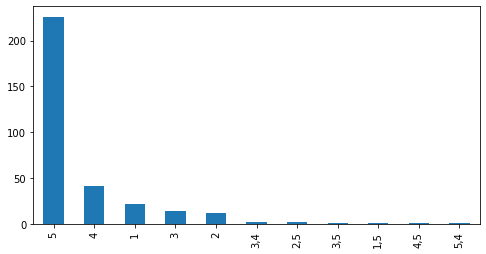

In [103]:
films.Hear_About.value_counts().plot(kind='bar',figsize=(8,4))
plt.show()

### Keeping aside word of mouth , website and television can be used as advertisemnt outlets.